In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000


In [ ]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train (2).csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train.shape

(1460, 81)

In [ ]:
test.shape

(1459, 80)

In [ ]:
test_ID = test['Id']

# Now drop the 'Id' column since it's unnecessary for the prediction process
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

print('\nThe train data size after dropping Id feature is: {}' .format(train.shape))
print('The test data size after dropping Id feature is : {}'.format(test.shape))


The train data size after dropping Id feature is: (1460, 80)
The test data size after dropping Id feature is : (1459, 79)


In [ ]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

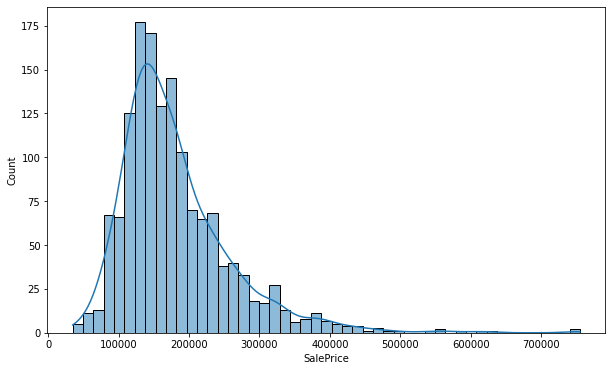

In [ ]:
plt.figure(figsize=(10, 6))
g = sns.histplot(train.SalePrice, kde = True)

In [ ]:
print('SalePrice Skewness is =' , train.SalePrice.skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

SalePrice Skewness is = 1.8828757597682129
Kurtosis: 6.536282


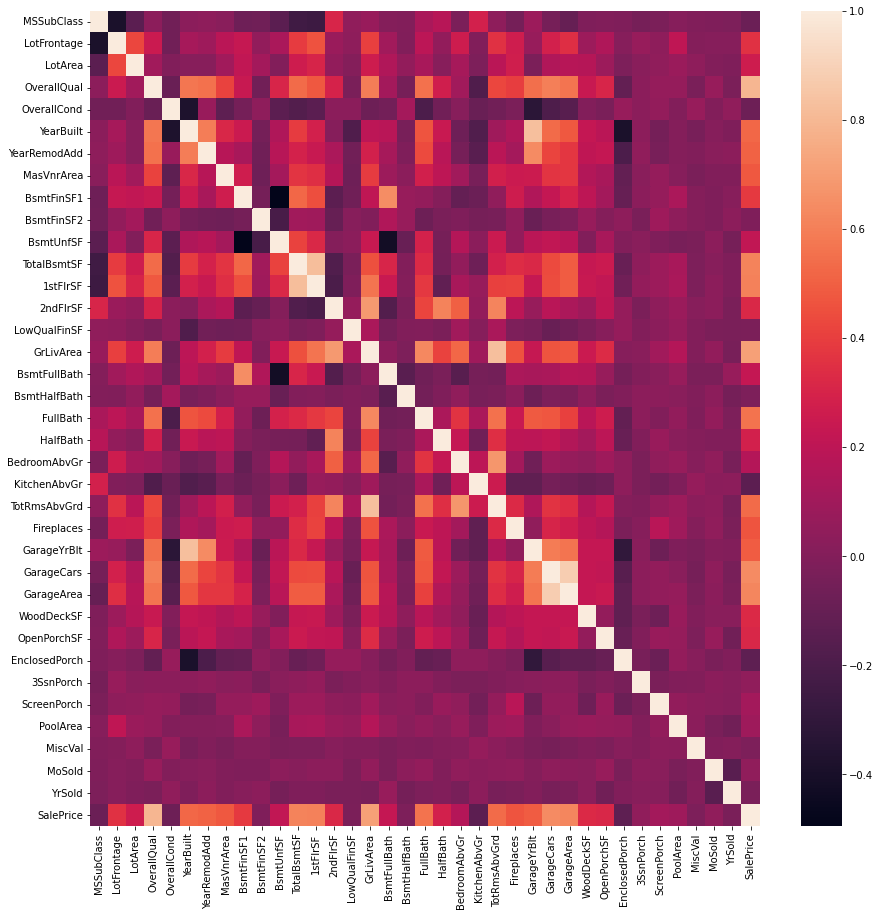

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(train.corr())

<function matplotlib.pyplot.show(*args, **kw)>

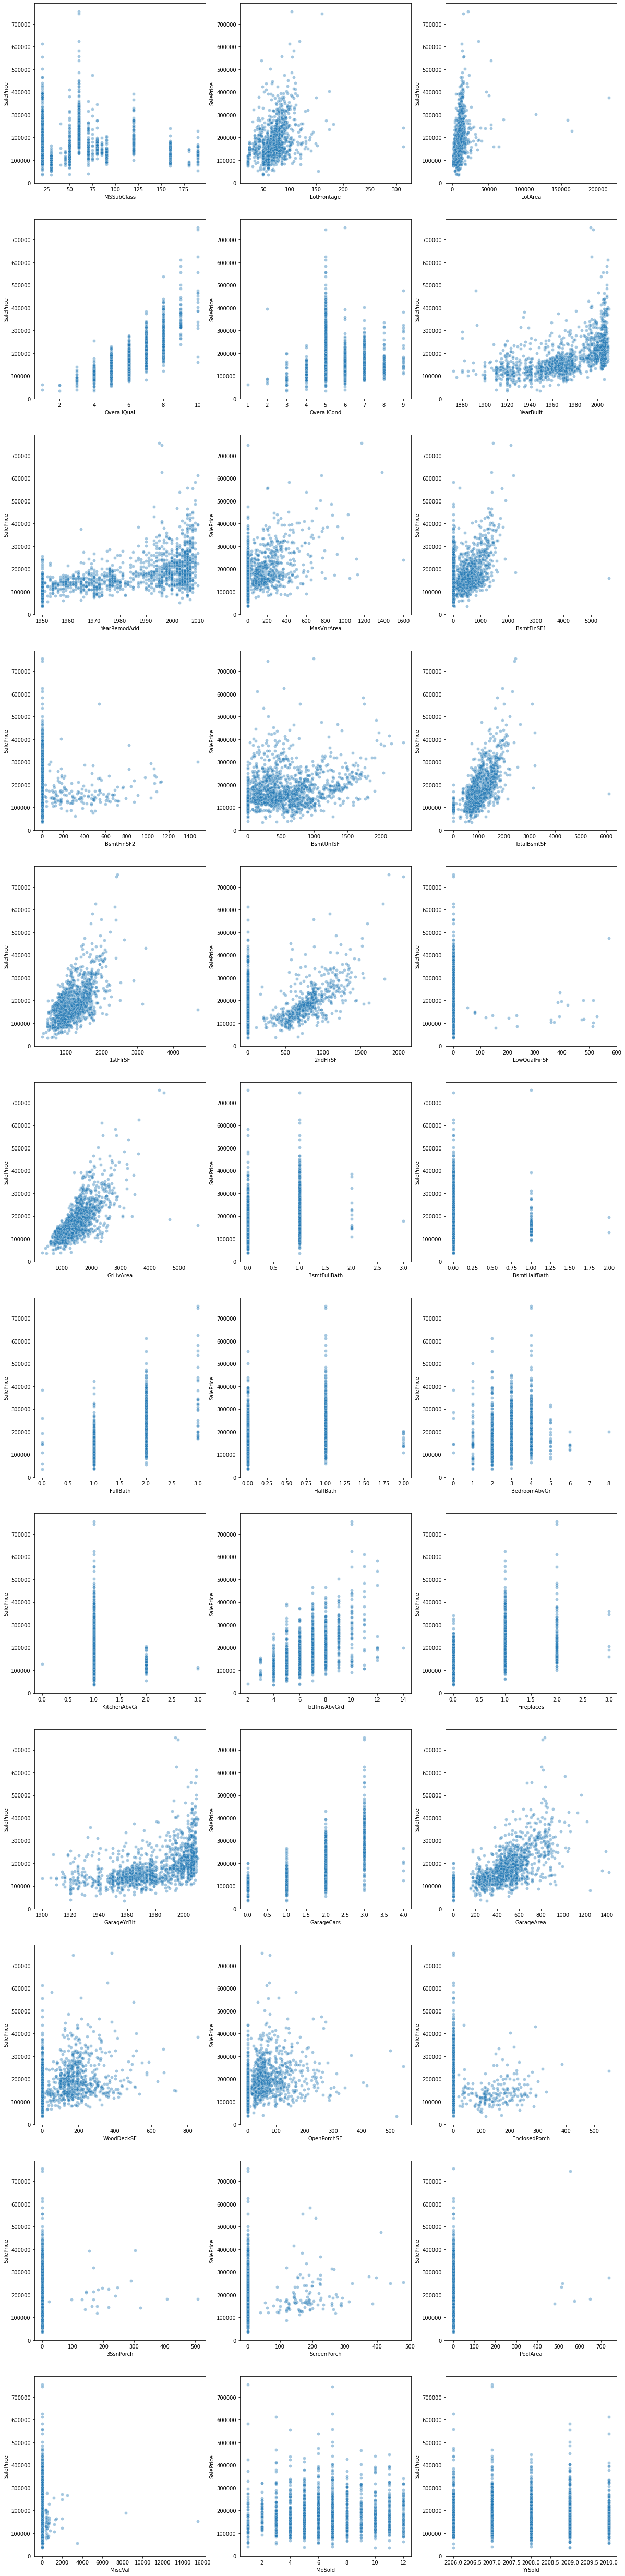

In [ ]:
numeric_dtypes = ['int16' , 'int32' , 'int64' , 'float16' , 'float32' , 'float64']
numerical_features=[]
for numerical_feature in train.columns:
    if train[numerical_feature].dtype in numeric_dtypes:
        numerical_features.append(numerical_feature)

plot , ax = plt.subplots(12,3 , figsize = (20 , 90))
for index in range(len(numerical_features)-1):
    sns.scatterplot(data = train , y = 'SalePrice' , x = numerical_features[index] , alpha=0.4 ,
                    ax = ax[math.floor(index/3)][index%3])
plt.show

In [ ]:
all_data = pd.concat([train , test]).reset_index(drop=True)
sale_price = train['SalePrice']
all_data.drop(columns = ['SalePrice'] , inplace = True)
all_data.shape

(2919, 79)

In [ ]:
len(all_data)

2919

In [ ]:
all_data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [ ]:
data_na = (all_data.isnull().sum() / len(all_data)) * 100
data_na = data_na[data_na==0].index
data_na

Index(['MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [ ]:
def check_missed_values(all_data):
    all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    return missing_data

In [ ]:
missing_data = check_missed_values(all_data)
missing_data.head(35)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


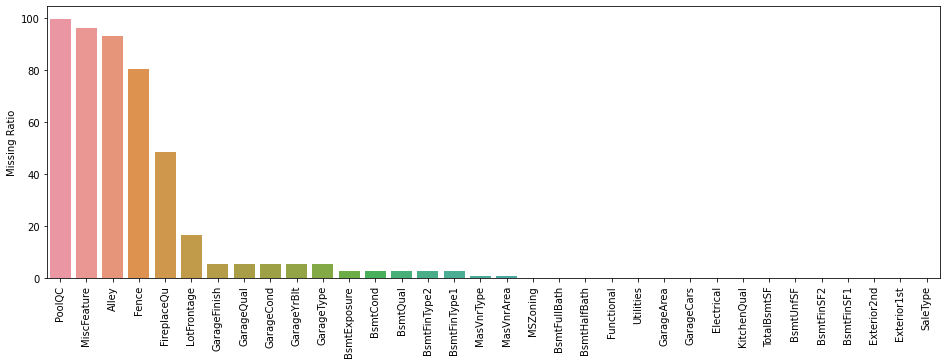

In [ ]:
plt.figure(figsize = (16,5))
plt.xticks(rotation = '90')
ax = sns.barplot(x = missing_data.index , y = missing_data['Missing Ratio'])

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data.drop(columns = ["Utilities"] , inplace = True)
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
missing_data = check_missed_values(all_data)
missing_data.head()

,Missing Ratio


In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
train = all_data[:len(train)]
train["SalePrice"] = sale_price
test = all_data[len(train):]
a = train[(train["OverallQual"] == 10) & (train["SalePrice"] <=250000)].index
a

Int64Index([523, 1298], dtype='int64')

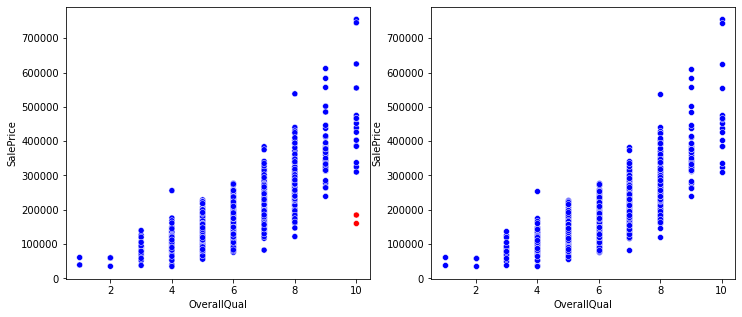

In [ ]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train["OverallQual"] == 10) & (train["SalePrice"] <= 250000)
sns.scatterplot(data = train ,x = "OverallQual", y = "SalePrice", c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,ax = ax[0])
# Drop rows(Outliers) where 'OverallQual' ==10 & 'SalePrice' <=250000
train.drop(train[(train["OverallQual"] == 10) & (train["SalePrice"] <=250000)].index , inplace = True)
sns.scatterplot(data = train ,x = "OverallQual", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()

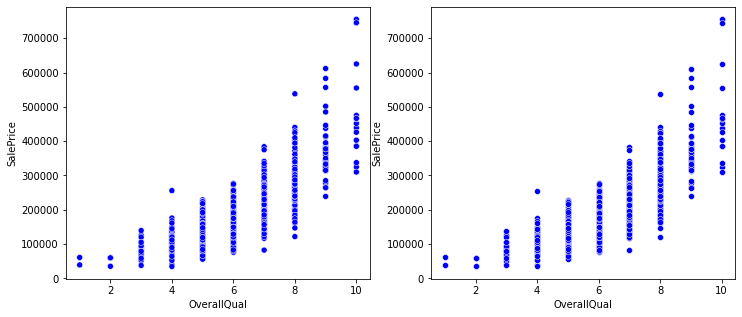

In [ ]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train["OverallQual"] == 10) & (train["SalePrice"] <= 250000)
sns.scatterplot(data = train ,x = "OverallQual", y = "SalePrice", c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,ax = ax[0])
# Drop rows(Outliers) where 'OverallQual' ==10 & 'SalePrice' <=250000
train.drop(train[(train["OverallQual"] == 10) & (train["SalePrice"] <=250000)].index , inplace = True)
sns.scatterplot(data = train ,x = "OverallQual", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()

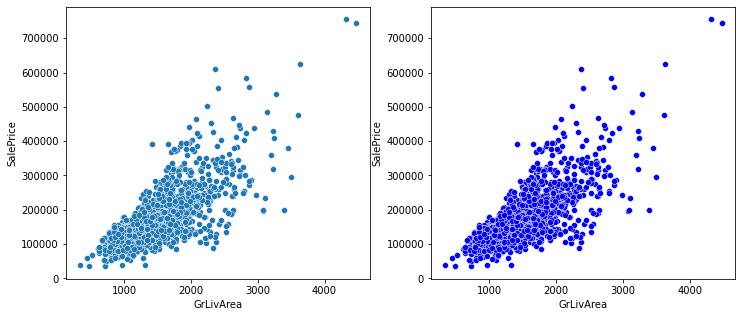

In [ ]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
sns.scatterplot(data = train ,x = "GrLivArea", y = "SalePrice" ,ax = ax[0])
sns.scatterplot(data = train ,x = "GrLivArea", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()

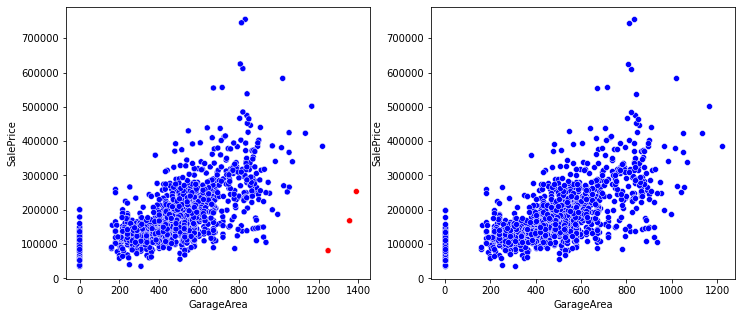

In [ ]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train["GarageArea"] > 1200 ) & (train["SalePrice"] <= 300000)
sns.scatterplot(data = train ,x = "GarageArea", y = "SalePrice" , c = ["red" if is_outlier else "blue" for is_outlier in outliers],ax = ax[0])
train.drop(train[(train["GarageArea"] > 1200 ) & (train["SalePrice"] <= 300000)].index , inplace = True)
sns.scatterplot(data = train ,x = "GarageArea", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()

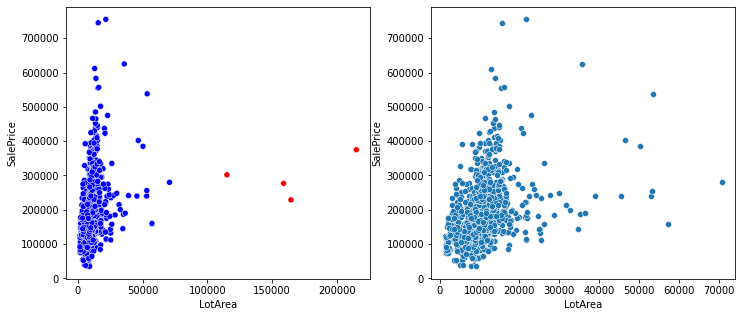

In [ ]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train["LotArea"] >= 100000)
sns.scatterplot(data = train ,x = "LotArea", y = "SalePrice" ,  c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,ax = ax[0])
train.drop(train[ (train["LotArea"] >= 100000)].index , inplace = True)
sns.scatterplot(data = train ,x = "LotArea", y = "SalePrice", ax = ax[1])
plt.show()

In [ ]:
outliers = (train["YearBuilt"] < 1900) & (train["SalePrice"] >= 400000)
outliers

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

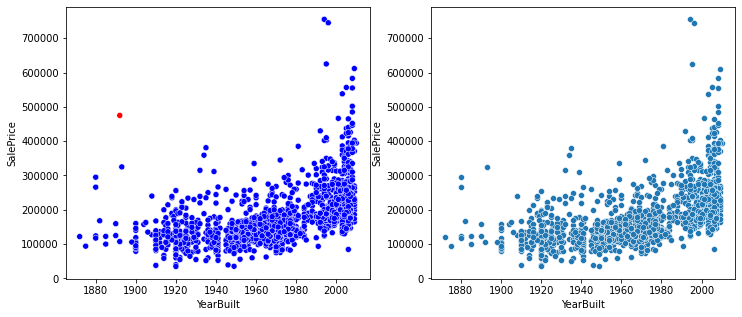

In [ ]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train["YearBuilt"] < 1900) & (train["SalePrice"] >= 400000)
sns.scatterplot(data = train ,x = "YearBuilt", y = "SalePrice" ,c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,  ax = ax[0])
train.drop(train[outliers].index , inplace = True)
sns.scatterplot(data = train ,x = "YearBuilt", y = "SalePrice", ax = ax[1])
plt.show()

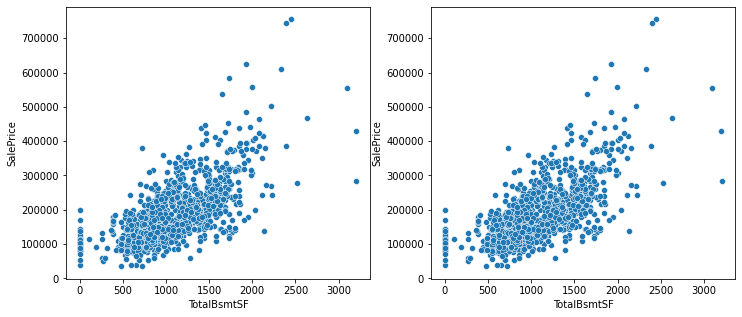

In [ ]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
sns.scatterplot(data = train ,x = "TotalBsmtSF", y = "SalePrice" ,  ax = ax[0])
sns.scatterplot(data = train ,x = "TotalBsmtSF", y = "SalePrice", ax = ax[1])
plt.show()

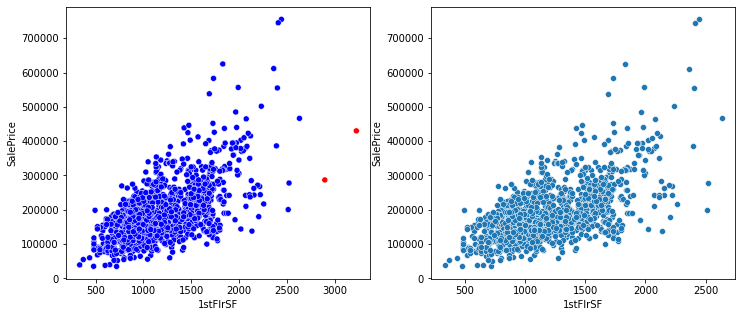

In [ ]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train["1stFlrSF"] > 2700)
sns.scatterplot(data = train ,x = "1stFlrSF", y = "SalePrice" ,c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,  ax = ax[0])
train.drop(train[outliers].index , inplace = True)
sns.scatterplot(data = train ,x = "1stFlrSF", y = "SalePrice", ax = ax[1])
plt.show()

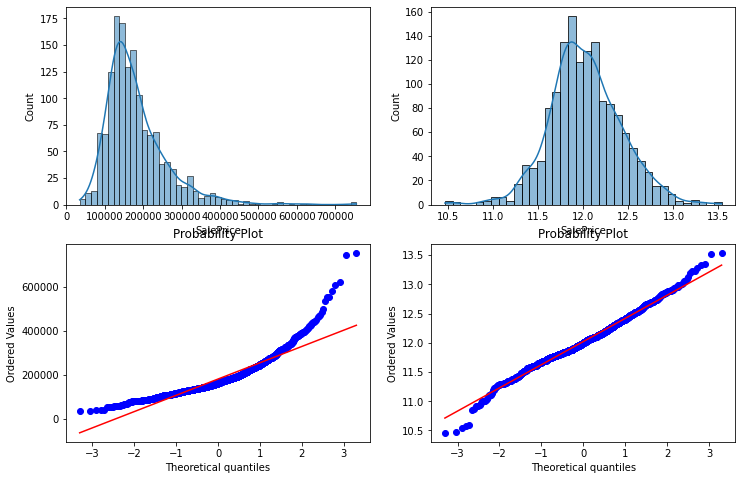

In [ ]:


plot , ax = plt.subplots(2 , 2 , figsize = (12 , 8))
g = sns.histplot(sale_price , kde = True , ax = ax[0][0])
res = stats.probplot(sale_price, plot= ax[1][0])
sale_price = np.log1p(train["SalePrice"])
g = sns.histplot(sale_price , kde = True , ax = ax[0][1])
res = stats.probplot(sale_price, plot= ax[1][1])

In [ ]:
all_data = pd.concat([train, test]).reset_index(drop=True)
all_data.drop(columns = ["SalePrice"] , inplace = True)
all_data.shape

(2907, 78)

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index


skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.934924
PoolArea,17.658029
LowQualFinSF,12.390364
3SsnPorch,11.352135
KitchenAbvGr,4.292019
BsmtFinSF2,4.162751
EnclosedPorch,4.019464
BsmtHalfBath,3.936475
ScreenPorch,3.925258
LotArea,3.615978


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    # boxcox1p function
    # y = ((1+x)**lmbda - 1) / lmbda  if lmbda != 0
    # log(1+x)                        if lmbda == 0
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 33 skewed numerical features to Box Cox transform


In [ ]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)
all_data.shape

(2907, 329)

In [ ]:
all_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,Fireplac

In [ ]:
train_data = all_data[:len(train)]
test_data = all_data[len(train):]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor


import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
target = sale_price
train = train_data

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=12, random_state=42, shuffle=True)
scores = {}

In [ ]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train , Y=target):
    rmse = np.sqrt(-cross_val_score(model,X, Y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [ ]:
decision_tree_model = DecisionTreeRegressor()
score = cv_rmse(decision_tree_model)
print('Decision Tree Model: {:.4f} ({:.4f})'.format(score.mean() , score.std()))

Decision Tree Model: 0.1944 (0.0168)


In [ ]:
from sklearn.model_selection import GridSearchCV , learning_curve
clf = GridSearchCV(decision_tree_model , {
    "max_depth" : [6,7,8,9,10,11,12],
    "min_samples_split": [6,7,8,9,10],
    "min_samples_leaf" : [5,7,8,9,10]
},verbose = 1)
clf.fit(train , target)
clf.best_estimator_

Fitting 5 folds for each of 175 candidates, totalling 875 fits


DecisionTreeRegressor(max_depth=12, min_samples_leaf=7, min_samples_split=6)

In [ ]:
score = cv_rmse(clf.best_estimator_)
print('Decision Tree Model: {:.4f} ({:.4f})'.format(score.mean(), score.std()))
scores['decision_tree'] = (score.mean(), score.std())

Decision Tree Model: 0.1786 (0.0188)


In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)
score = cv_rmse(random_forest_model)
print('Random Forest Model: {:.4f} ({:.4f})'.format(score.mean(), score.std()))
scores['random_forest'] = (score.mean(), score.std())

Random Forest Model: 0.1356 (0.0173)


In [ ]:
gbr = GradientBoostingRegressor(loss='huber',random_state=42)
score = cv_rmse(gbr)
print("gradient_boosting: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gradient boosting'] = (score.mean(), score.std())

gradient_boosting: 0.1200 (0.0157)


In [ ]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(objective='reg:squarederror',random_state=42)
score = cv_rmse(xgboost)
print("xgboost_model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Xgboost'] = (score.mean(), score.std())

xgboost_model: 0.1224 (0.0168)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, RidgeCV #multicollinearity data
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))
score = cv_rmse(ridge)
print("Ridge Regressor: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge_model'] = (score.mean(), score.std())

Ridge Regressor: 0.1096 (0.0176)


In [ ]:
from sklearn.svm import SVR
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
score = cv_rmse(svr)
print("Support Vector Machine: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Support Vector Machine'] = (score.mean(), score.std())

Support Vector Machine: 0.1087 (0.0205)


In [ ]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', verbose=1,random_state=42)
score = cv_rmse(lightgbm)
print("Light Gbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Lgbm'] = (score.mean(), score.std())

Light Gbm: 0.1242 (0.0144)


In [ ]:
decision_tree_model_full_data = decision_tree_model.fit(train , target)
random_forest_model_full_data = random_forest_model.fit(train , target)
gbr_full_data = gbr.fit(train , target)
xgboost_full_data = xgboost.fit(train , target)
ridge_full_data = ridge.fit(train , target)
svr_full_data = svr.fit(train , target)
lightgbm_full_data = lightgbm.fit(train , target)
gbr_full_data

GradientBoostingRegressor(loss='huber', random_state=42)

In [ ]:
def blended_predictions(X):
    return ((0.1 * random_forest_model_full_data.predict(X)) + \
            (0.2 * gbr_full_data.predict(X)) + \
            (0.1 * xgboost_full_data.predict(X)) + \
            (0.2 * ridge_full_data.predict(X)) + \
            (0.1 * lightgbm_full_data.predict(X)) + \
            (0.3 * svr_full_data.predict(X)))

In [ ]:
blended_score = rmsle(target, blended_predictions(train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.07482889163575365
